In [ ]:
#Import Library
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [ ]:
#Read dataset
dt = pd.read_csv("weather_denpasar.csv", sep = ",")
dt.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,temp_min,temp_max,pressure,...,snow_3h,snow_6h,snow_12h,snow_24h,snow_today,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1546300800,2019-01-01 00:00:00 +0000 UTC,28800,Denpasar,-8.652497,115.219117,27.13,27.0,27.4,1010.0,...,NaN,NaN,NaN,NaN,NaN,40,500,Rain,light rain,10d
1,1546304400,2019-01-01 01:00:00 +0000 UTC,28800,Denpasar,-8.652497,115.219117,27.77,27.4,28.0,1010.0,...,NaN,NaN,NaN,NaN,NaN,20,500,Rain,light rain,10d
2,1546308000,2019-01-01 02:00:00 +0000 UTC,28800,Denpasar,-8.652497,115.219117,29.53,29.0,30.4,1010.0,...,NaN,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02d
3,1546311600,2019-01-01 03:00:00 +0000 UTC,28800,Denpasar,-8.652497,115.219117,30.13,30.0,30.4,1010.0,...,NaN,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02d
4,1546315200,2019-01-01 04:00:00 +0000 UTC,28800,Denpasar,-8.652497,115.219117,30.15,30.0,30.4,1009.0,...,NaN,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02d


##Data Exploration

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29392 entries, 0 to 29391
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   29392 non-null  int64  
 1   dt_iso               29392 non-null  object 
 2   timezone             29392 non-null  int64  
 3   city_name            29392 non-null  object 
 4   lat                  29392 non-null  float64
 5   lon                  29392 non-null  float64
 6   temp                 29392 non-null  float64
 7   temp_min             29392 non-null  float64
 8   temp_max             29392 non-null  float64
 9   pressure             29392 non-null  float64
 10  sea_level            0 non-null      float64
 11  grnd_level           0 non-null      float64
 12  humidity             29392 non-null  int64  
 13  wind_speed           29392 non-null  float64
 14  wind_deg             29392 non-null  int64  
 15  rain_1h              65 non-null    

Dari hasil di atas dapat terlihat bahwa dataset masih memiliki banyak missing value. Jika dilihat dari data exploration yang telah dilakukan pada tahap sebelumnya, diketahui bahwa kolom sea_level, grnd_level, rain_1h, rain_3h, rain_6h, rain_12h, rain_24h, rain_today, snow_1h, snow_3h, snow_6h, snow_12h, snow_24h, dan snow_today mamiliki jumlah missing value dalam jumlah besar jika dibandingkan dengan jumlah data keseluruhan atau kosong. Oleh karena itu, untuk mempermudah pengelolahan data, variabel-variabel tersebut akan dihilangkan.

In [ ]:
df=dt.drop(['sea_level', 'grnd_level', 'rain_1h', 'rain_3h', 'rain_6h', 'rain_12h', 'rain_24h', 'rain_today', 'snow_1h', 'snow_3h', 'snow_6h', 'snow_12h', 'snow_24h', 'snow_today'], axis=1)

In [ ]:
df.describe()

,dt,timezone,lat,lon,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id
count,2.939200e+04,29392.0,2.939200e+04,2.939200e+04,29392.000000,29392.000000,29392.000000,29392.000000,29392.000000,29392.000000,29392.000000,29392.000000,29392.000000
mean,1.547348e+09,28800.0,-8.652497e+00,1.152191e+02,27.458362,27.224631,27.688354,1010.404872,81.365508,3.859576,155.316208,32.722067,764.419434
std,2.078597e+07,0.0,1.776387e-15,4.263329e-14,1.896626,1.911005,1.903930,2.320490,8.396948,2.154226,95.690717,18.075248,113.163638
min,1.504382e+09,28800.0,-8.652497e+00,1.152191e+02,20.890000,20.000000,21.000000,1002.000000,49.000000,0.110000,0.000000,0.000000,200.000000
25%,1.530561e+09,28800.0,-8.652497e+00,1.152191e+02,26.030000,26.000000,26.100000,1009.000000,74.000000,2.100000,100.000000,20.000000,801.000000
50%,1.551544e+09,28800.0,-8.652497e+00,1.152191e+02,27.300000,27.000000,27.700000,1010.300000,83.000000,3.600000,120.000000,20.000000,801.000000
75%,1.564644e+09,28800.0,-8.652497e+00,1.152191e+02,28.830000,28.600000,29.000000,1012.000000,88.000000,5.140000,250.000000,40.000000,802.000000
max,1.577833e+09,28800.0,-8.652497e+00,1.152191e+02,34.130000,34.000000,34.400000,1017.000000,100.000000,13.900000,360.000000,100.000000,804.000000


In [ ]:
df.describe(include=object)

,dt_iso,city_name,weather_main,weather_description,weather_icon
count,29392,29392,29392,29392,29392
unique,20404,1,8,19,16
top,2019-03-23 16:00:00 +0000 UTC,Denpasar,Clouds,few clouds,02d
freq,4,29392,26140,15968,8295


In [ ]:
df['weather_main'].unique()

array(['Rain', 'Clouds', 'Clear', 'Thunderstorm', 'Smoke', 'Mist', 'Haze',
       'Ash'], dtype=object)

In [ ]:
print(df['timezone'].unique())
print(df['city_name'].unique())
print(df['lat'].unique())
print(df['lon'].unique())

[28800]
['Denpasar']
[-8.652497]
[115.219117]


Variabel timezone, city_name, lat, dan lon tidak memiliki unique values sehingga tidak perlu digunakan dalam penelitiaan. Selain itu, variabel dt dan dt_iso juga tidak terlalu penting. Kemudian untuk weather_id, weather_description dan weather_icon juga tidak dimasukkan ke dalam penelitiaan. Hal itu karena weather_id hanya menunjukkan nomor id dari weather, weather_description hanya menjelaskan weather_main secara rinci, serta weather_icon menunjukkan simbol pada website.

In [ ]:
df=df.drop(['dt','dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'weather_description', 'weather_id', 'weather_icon' ], axis=1)
df.head()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_main
0,27.13,27.0,27.4,1010.0,94,0.5,0,40,Rain
1,27.77,27.4,28.0,1010.0,88,2.1,240,20,Rain
2,29.53,29.0,30.4,1010.0,83,3.1,240,20,Clouds
3,30.13,30.0,30.4,1010.0,79,4.1,260,20,Clouds
4,30.15,30.0,30.4,1009.0,79,4.1,260,20,Clouds


<Axes: xlabel='weather_main', ylabel='count'>

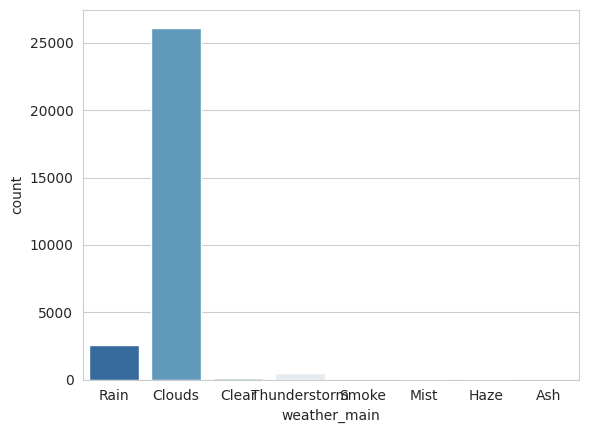

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='weather_main',data=df,palette='RdBu_r')

In [ ]:
index_def = df[(df['weather_main'] == 'Smoke') |(df['weather_main'] == 'Mist') |(df['weather_main'] == 'Haze')| (df['weather_main'] == 'Ash')].index

In [ ]:
df = df.drop(index_def)
df.head()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_main
0,27.13,27.0,27.4,1010.0,94,0.5,0,40,Rain
1,27.77,27.4,28.0,1010.0,88,2.1,240,20,Rain
2,29.53,29.0,30.4,1010.0,83,3.1,240,20,Clouds
3,30.13,30.0,30.4,1010.0,79,4.1,260,20,Clouds
4,30.15,30.0,30.4,1009.0,79,4.1,260,20,Clouds


<Axes: xlabel='weather_main', ylabel='count'>

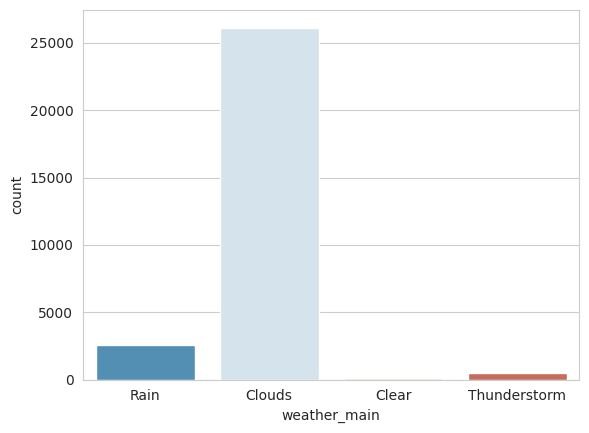

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='weather_main',data=df,palette='RdBu_r')

In [ ]:
df['weather_main'].value_counts()

Clouds          26140
Rain             2598
Thunderstorm      513
Clear             113
Name: weather_main, dtype: int64

Dari data diatas, dapat terlihat bahwa kategori Haze, Mist, Smoke, dan Ash memiliki jumlah yang secara signifikan lebih kecil dibandingkan kategori lainnya. Untuk menangani jumlah data yang imbalance, kategori yang diteliti hanya berfokus pada clouds, rain, thunderstorm, dan clear saja. Oleh sebab itu data dengan kategori selain 4 cuaca tersebut akan dihilangkan.

<ipython-input-15-37fb04b7e8b5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

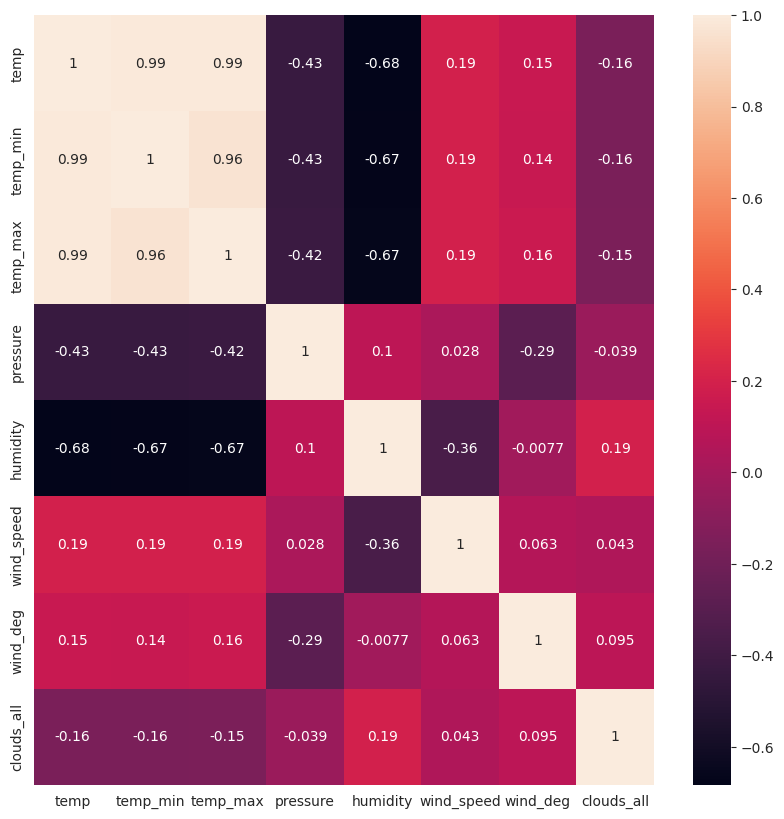

In [ ]:
#Checking Autokorelasi
corr = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

Dari heatmap diatas, dapat kita lihat bahwa variabel temp, temp_min, dan temp_max saling autokorelasi. dan variabel humidity memiliki korelasi tingkat korelasi yang cukup rendah. Oleh karena itu, variabel temp_min, temp_max, dan humidity akan dihilangkan.

In [ ]:
df=df.drop(['temp_min', 'temp_max', 'humidity' ], axis=1)

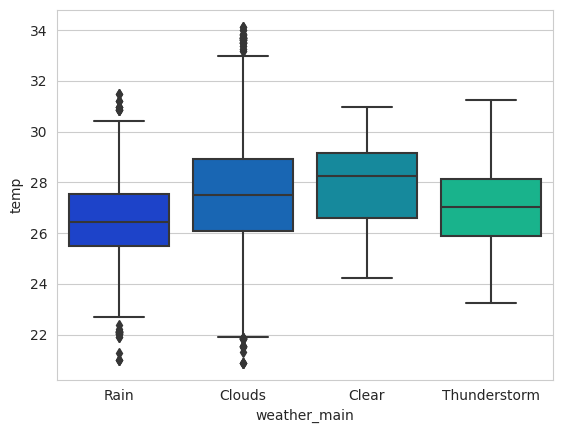

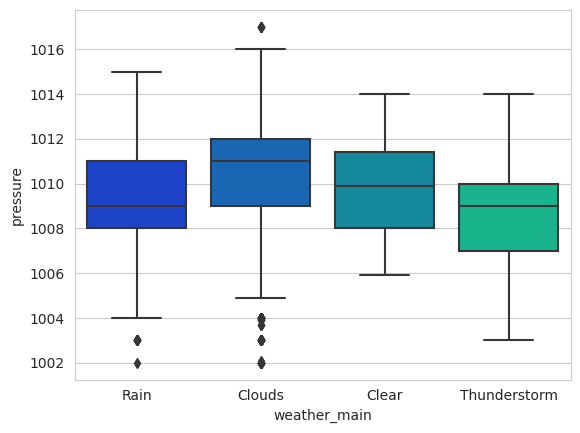

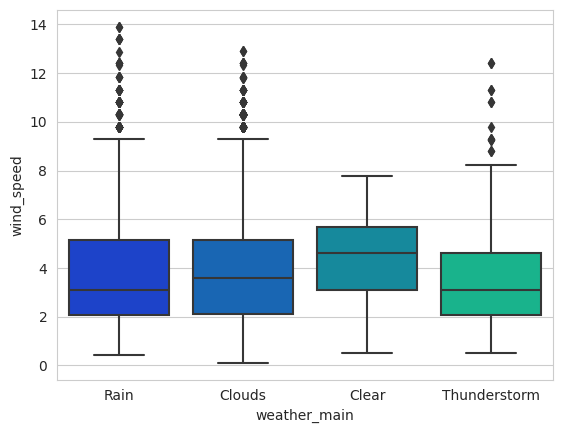

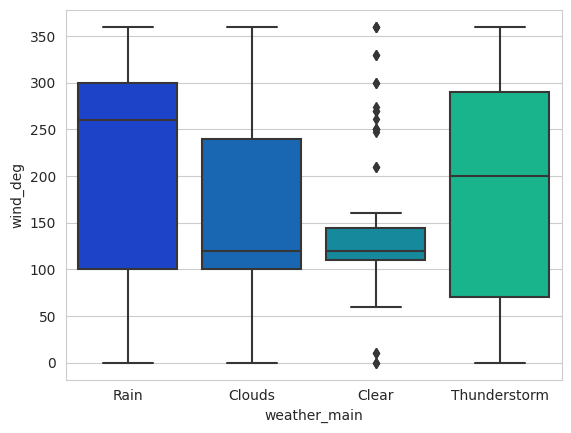

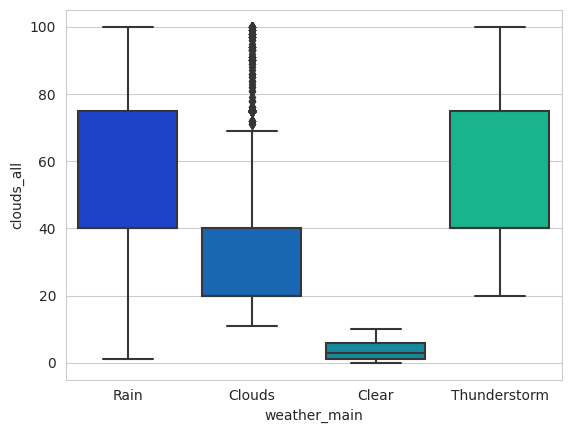

<Figure size 640x480 with 0 Axes>

In [ ]:
dt=list(df.columns[0:10])
for i in range(len(dt)-1):
    sns.boxplot(x='weather_main',y=dt[i],data=df, palette='winter')
    plt.figure()

##Data Preprocessing

Untuk memastikan kolom lain tidak memiliki value NULL, maka akan dilakukannya .dropna() untuk menghapus baris yang memiliki value NULL

In [ ]:
df = df.dropna()

In [ ]:
np.sum(pd.isna(df).sum())

0

In [ ]:
#mengubah data kategori menjadi skala nominal
df['weather_main'].replace(['Rain', 'Clouds', 'Clear', 'Thunderstorm'], [0,1,2,3], inplace = True)
df

,temp,pressure,wind_speed,wind_deg,clouds_all,weather_main
0,27.13,1010.0,0.5,0,40,0
1,27.77,1010.0,2.1,240,20,0
2,29.53,1010.0,3.1,240,20,1
3,30.13,1010.0,4.1,260,20,1
4,30.15,1009.0,4.1,260,20,1
...,...,...,...,...,...,...
29382,27.77,1011.0,2.1,80,20,1
29383,27.13,1011.0,1.0,0,20,1
29384,27.77,1010.0,1.5,20,20,1
29385,27.08,1009.0,1.0,160,20,1


##Data Processing

In [ ]:
#menentukan variabel y
y = df['weather_main']
y.head()

0    0
1    0
2    1
3    1
4    1
Name: weather_main, dtype: int64

In [ ]:
#menentukan variabel x
x = df.drop('weather_main', axis = 1)
x.head()

,temp,pressure,wind_speed,wind_deg,clouds_all
0,27.13,1010.0,0.5,0,40
1,27.77,1010.0,2.1,240,20
2,29.53,1010.0,3.1,240,20
3,30.13,1010.0,4.1,260,20
4,30.15,1009.0,4.1,260,20


In [ ]:
#split dataset menjadi training 70% testing 30%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 90)

In [ ]:
#melihat data y_train
y_train.head()

22865    1
8580     1
19188    1
24421    1
5517     1
Name: weather_main, dtype: int64

In [ ]:
#melihat data x_train
x_train.head()

,temp,pressure,wind_speed,wind_deg,clouds_all
22865,28.85,1011.0,4.60,120,40
8580,31.92,1008.0,4.60,260,20
19188,30.42,1008.0,5.66,130,20
24421,28.92,1010.0,6.70,100,20
5517,24.23,1015.0,2.10,80,40


##Decision Tree

### Default

####Training

In [ ]:
dt = tree.DecisionTreeClassifier()

In [ ]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
yhat_train = dt.predict(x_train)
cm_train = confusion_matrix(y_train, yhat_train)
cm_train

array([[ 1849,     2,     0,    17],
       [    6, 18263,     0,     2],
       [    0,     0,    77,     0],
       [   90,     3,     0,   245]])

In [ ]:
print(classification_report(y_train, yhat_train))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1868
           1       1.00      1.00      1.00     18271
           2       1.00      1.00      1.00        77
           3       0.93      0.72      0.81       338

    accuracy                           0.99     20554
   macro avg       0.97      0.93      0.95     20554
weighted avg       0.99      0.99      0.99     20554



####Testing

In [ ]:
yhat_test = dt.predict(x_test)
cm_test = confusion_matrix(y_test, yhat_test)
cm_test

array([[ 456,  226,    0,   48],
       [ 271, 7559,    0,   39],
       [   1,    0,   35,    0],
       [  86,   38,    0,   51]])

In [ ]:
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.56      0.62      0.59       730
           1       0.97      0.96      0.96      7869
           2       1.00      0.97      0.99        36
           3       0.37      0.29      0.33       175

    accuracy                           0.92      8810
   macro avg       0.72      0.71      0.72      8810
weighted avg       0.92      0.92      0.92      8810



#### Grid Search

In [ ]:
param_grid = {'criterion':['gini','entropy'],
              'max_depth':np.arange(1,21).tolist()[0::2],
              'min_samples_split':np.arange(2,11).tolist()[0::2],
              'max_leaf_nodes':np.arange(3,26).tolist()[0::2]}

In [ ]:
grid = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, refit=True, verbose=1)

In [ ]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_leaf_nodes': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                            23, 25],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             verbose=1)

In [ ]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_leaf_nodes': 25,
 'min_samples_split': 2}

In [ ]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=9, max_leaf_nodes=25)

In [ ]:
grid_predictions = grid.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, grid_predictions))

[[ 206  524    0    0]
 [  69 7800    0    0]
 [   0    0   36    0]
 [  39  136    0    0]]


In [ ]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.66      0.28      0.39       730
           1       0.92      0.99      0.96      7869
           2       1.00      1.00      1.00        36
           3       0.00      0.00      0.00       175

    accuracy                           0.91      8810
   macro avg       0.64      0.57      0.59      8810
weighted avg       0.88      0.91      0.89      8810



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Max_depth = 7

#### Training

In [ ]:
dt = tree.DecisionTreeClassifier(max_depth = 7, random_state = 5)

In [ ]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=5)

In [ ]:
yhat_train = dt.predict(x_train)
cm_train = confusion_matrix(y_train, yhat_train)
cm_train

array([[  673,  1194,     0,     1],
       [  149, 18120,     0,     2],
       [    0,     0,    77,     0],
       [   92,   224,     0,    22]])

In [ ]:
print(classification_report(y_train, yhat_train))

              precision    recall  f1-score   support

           0       0.74      0.36      0.48      1868
           1       0.93      0.99      0.96     18271
           2       1.00      1.00      1.00        77
           3       0.88      0.07      0.12       338

    accuracy                           0.92     20554
   macro avg       0.89      0.60      0.64     20554
weighted avg       0.91      0.92      0.90     20554



#### Testing

In [ ]:
yhat_test = dt.predict(x_test)
cm_test = confusion_matrix(y_test, yhat_test)
cm_test

array([[ 236,  492,    0,    2],
       [  78, 7788,    0,    3],
       [   1,    0,   35,    0],
       [  51,  121,    0,    3]])

In [ ]:
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.64      0.32      0.43       730
           1       0.93      0.99      0.96      7869
           2       1.00      0.97      0.99        36
           3       0.38      0.02      0.03       175

    accuracy                           0.92      8810
   macro avg       0.74      0.58      0.60      8810
weighted avg       0.89      0.92      0.90      8810



### Max_depth = 9

#### Training

In [ ]:
dt = tree.DecisionTreeClassifier(max_depth = 9, random_state = 5)

In [ ]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=9, random_state=5)

In [ ]:
yhat_train = dt.predict(x_train)
cm_train = confusion_matrix(y_train, yhat_train)
cm_train

array([[  926,   940,     0,     2],
       [  164, 18107,     0,     0],
       [    0,     0,    77,     0],
       [  114,   185,     0,    39]])

In [ ]:
print(classification_report(y_train, yhat_train))

              precision    recall  f1-score   support

           0       0.77      0.50      0.60      1868
           1       0.94      0.99      0.97     18271
           2       1.00      1.00      1.00        77
           3       0.95      0.12      0.21       338

    accuracy                           0.93     20554
   macro avg       0.92      0.65      0.69     20554
weighted avg       0.93      0.93      0.92     20554



#### Testing

In [ ]:
yhat_test = dt.predict(x_test)
cm_test = confusion_matrix(y_test, yhat_test)
cm_test

array([[ 294,  427,    0,    9],
       [ 144, 7723,    0,    2],
       [   1,    0,   35,    0],
       [  68,   99,    0,    8]])

In [ ]:
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.58      0.40      0.48       730
           1       0.94      0.98      0.96      7869
           2       1.00      0.97      0.99        36
           3       0.42      0.05      0.08       175

    accuracy                           0.91      8810
   macro avg       0.73      0.60      0.63      8810
weighted avg       0.90      0.91      0.90      8810



### Max_Depth = 12

#### Training

In [ ]:
dt = tree.DecisionTreeClassifier(max_depth = 12, random_state = 5)

In [ ]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=12, random_state=5)

In [ ]:
yhat_train = dt.predict(x_train)
cm_train = confusion_matrix(y_train, yhat_train)
cm_train

array([[ 1204,   651,     0,    13],
       [   99, 18170,     0,     2],
       [    0,     0,    77,     0],
       [   92,   128,     0,   118]])

In [ ]:
print(classification_report(y_train, yhat_train))

              precision    recall  f1-score   support

           0       0.86      0.64      0.74      1868
           1       0.96      0.99      0.98     18271
           2       1.00      1.00      1.00        77
           3       0.89      0.35      0.50       338

    accuracy                           0.95     20554
   macro avg       0.93      0.75      0.80     20554
weighted avg       0.95      0.95      0.95     20554



#### Testing

In [ ]:
yhat_test = dt.predict(x_test)
cm_test = confusion_matrix(y_test, yhat_test)
cm_test

array([[ 328,  372,    0,   30],
       [ 168, 7691,    0,   10],
       [   1,    0,   35,    0],
       [  71,   81,    0,   23]])

In [ ]:
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.58      0.45      0.51       730
           1       0.94      0.98      0.96      7869
           2       1.00      0.97      0.99        36
           3       0.37      0.13      0.19       175

    accuracy                           0.92      8810
   macro avg       0.72      0.63      0.66      8810
weighted avg       0.90      0.92      0.91      8810



### Max_depth = 15

####Training

In [ ]:
dt = tree.DecisionTreeClassifier(max_depth=15, random_state = 5)

In [ ]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=5)

In [ ]:
yhat_train = dt.predict(x_train)
cm_train = confusion_matrix(y_train, yhat_train)
cm_train

array([[ 1484,   370,     0,    14],
       [   70, 18201,     0,     0],
       [    0,     0,    77,     0],
       [   90,    94,     0,   154]])

In [ ]:
print(classification_report(y_train, yhat_train))

              precision    recall  f1-score   support

           0       0.90      0.79      0.85      1868
           1       0.98      1.00      0.99     18271
           2       1.00      1.00      1.00        77
           3       0.92      0.46      0.61       338

    accuracy                           0.97     20554
   macro avg       0.95      0.81      0.86     20554
weighted avg       0.97      0.97      0.97     20554



####Testing

In [ ]:
yhat_test = dt.predict(x_test)
cm_test = confusion_matrix(y_test, yhat_test)
cm_test

array([[ 374,  317,    0,   39],
       [ 214, 7636,    0,   19],
       [   1,    0,   35,    0],
       [  76,   67,    0,   32]])

In [ ]:
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.56      0.51      0.54       730
           1       0.95      0.97      0.96      7869
           2       1.00      0.97      0.99        36
           3       0.36      0.18      0.24       175

    accuracy                           0.92      8810
   macro avg       0.72      0.66      0.68      8810
weighted avg       0.91      0.92      0.91      8810



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [ ]:
def RandomForest():
    rf = RandomForestClassifier(random_state = 5)
    rf.fit(x_train, y_train)
    plt_rf = plt.figure(figsize = (100,100))

    ypredict_train = rf.predict(x_train)
    ypredict_test = rf.predict(x_test)

    yhat_train = (ypredict_train >= 0.5).astype(int)
    yhat_test = (ypredict_test >= 0.5).astype(int)

    train_report = classification_report(y_train, yhat_train)
    test_report = classification_report(y_test, yhat_test)

    rf_train_acc = classification_report(y_train, yhat_train, output_dict = True)['accuracy']
    rf_test_acc = classification_report(y_test, yhat_test, output_dict = True)['accuracy']

    return train_report, test_report, rf_train_acc, rf_test_acc

In [ ]:
rft = RandomForest()

print("Training Data")
print(rft[0])
print("Training Accuracy = ", rft[2])
print("\n")
print("Testing Data")
print(rft[1])
print("Testing Accuracy = ", rft[3])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Training Data
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1868
           1       0.98      1.00      0.99     18271
           2       0.00      0.00      0.00        77
           3       0.00      0.00      0.00       338

    accuracy                           0.98     20554
   macro avg       0.49      0.49      0.49     20554
weighted avg       0.96      0.98      0.97     20554

Training Accuracy =  0.977084752359638


Testing Data
              precision    recall  f1-score   support

           0       0.72      0.61      0.66       730
           1       0.95      0.99      0.97      7869
           2       0.00      0.00      0.00        36
           3       0.00      0.00      0.00       175

    accuracy                           0.93      8810
   macro avg       0.42      0.40      0.41      8810
weighted avg       0.91      0.93      0.92      8810

Testing Accuracy =  0.9320090805902383


<Figure size 10000x10000 with 0 Axes>

In [ ]:
def RandomForest():
    param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2']
    }
    rf = RandomForestClassifier(random_state = 5)
    rf.fit(x_train, y_train)

    grid_search = GridSearchCV(rf, param_grid, cv=5)
    grid_search.fit(x_train, y_train)

    best_params = grid_search.best_params_

    rf_best_param = RandomForestClassifier(random_state=42, **best_params)
    rf_best_param.fit(x_train, y_train)

    ypredict_train = rf_best_param.predict(x_train)
    ypredict_test = rf_best_param.predict(x_test)

    yhat_train = (ypredict_train >= 0.5).astype(int)
    yhat_test = (ypredict_test >= 0.5).astype(int)

    train_report = classification_report(y_train, yhat_train)
    test_report = classification_report(y_test, yhat_test)

    rf_train_acc = classification_report(y_train, yhat_train, output_dict = True)['accuracy']
    rf_test_acc = classification_report(y_test, yhat_test, output_dict = True)['accuracy']

    print(confusion_matrix(y_test, ypredict_test))
    return train_report, test_report, rf_train_acc, rf_test_acc

In [ ]:
rft = RandomForest()

print("Training Data")
print(rft[0])
print("Training Accuracy = ", rft[2])
print("\n")
print("Testing Data")
print(rft[1])
print("Testing Accuracy = ", rft[3])

[[ 449  235    0   46]
 [  99 7766    0    4]
 [   0    0   36    0]
 [  77   50    0   48]]
Training Data
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1868
           1       0.98      1.00      0.99     18271
           2       0.00      0.00      0.00        77
           3       0.00      0.00      0.00       338

    accuracy                           0.98     20554
   macro avg       0.48      0.50      0.49     20554
weighted avg       0.96      0.98      0.97     20554

Training Accuracy =  0.978009146638124


Testing Data
              precision    recall  f1-score   support

           0       0.72      0.62      0.66       730
           1       0.95      0.99      0.97      7869
           2       0.00      0.00      0.00        36
           3       0.00      0.00      0.00       175

    accuracy                           0.93      8810
   macro avg       0.42      0.40      0.41      8810
weighted avg       0.91 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif